<a href="https://colab.research.google.com/github/Jungseunggi/Section4_week1/blob/main/Section4_week1_day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Section4 1일차**

##**1. 퍼셉트론(perceptron)**

###**1.1 퍼셉트론의 정의**

* 초기 형태의 인공 신경망으로 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘
* 인공 신경망을 구성하는 하나의 작은 단위
* 따라서 퍼셉트론들이 다층으로 이루어져있는걸 deap learning이라고 함
* 입력 "x"에 학습된 가중치 계수를 곱한 값을 매핑하고 출력 값 "f(x)"를 생성하는 함수
* 예를들어 우리가 적색신호를 받고 대기하고 있는 중 청색불로 바뀌어서 출발 이런 과정속에서 크게 시각적 신호를 받고 뇌로 전달 한다고 하면 시각적신호를 받는 것도 퍼셉트론이라 볼 수 있음
* 다층 퍼셉트론은 여러 층이 되어있다는 말로 뇌로 전달하는 과정까지 봐도 되고 그 이후 행동까지 볼 수 있음 

###**1.2 퍼셉트론 원리**

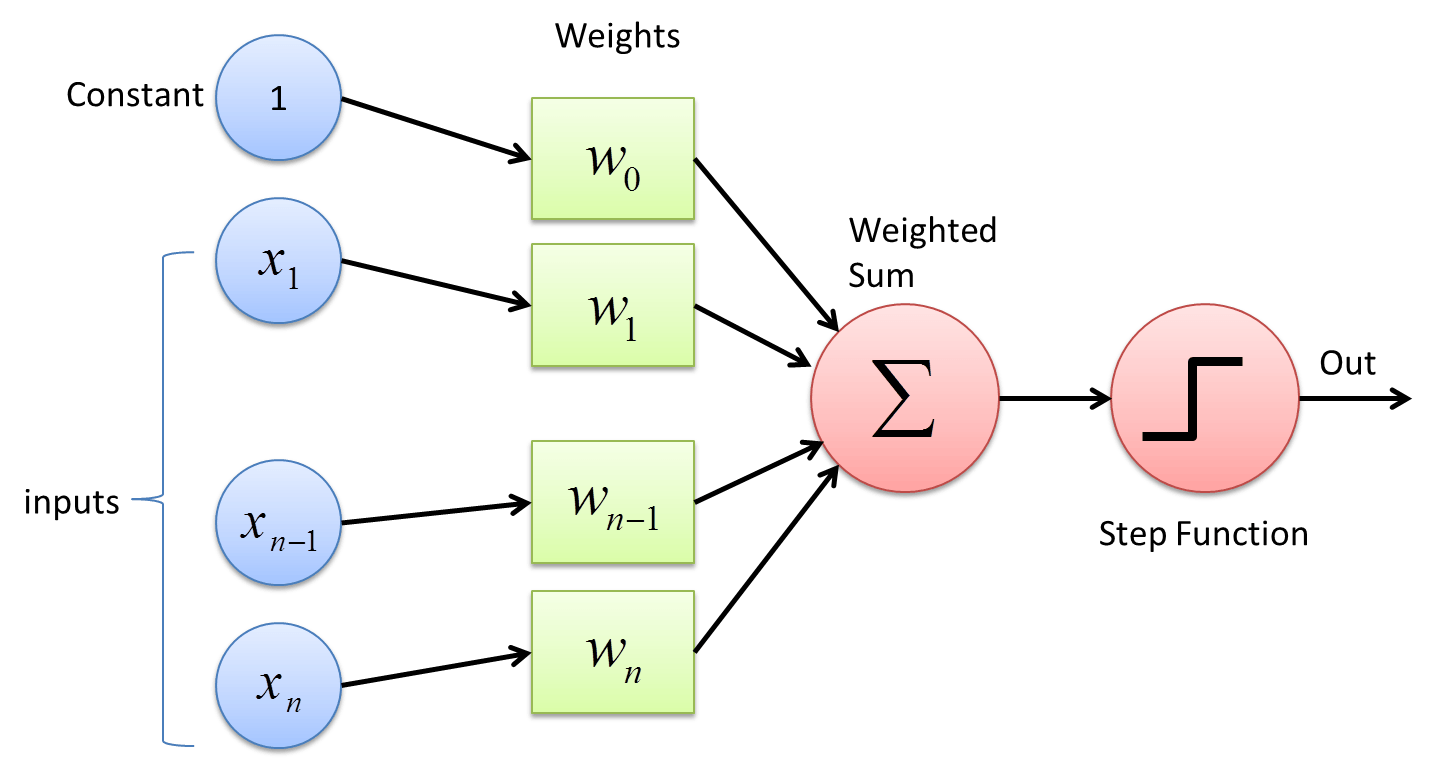

* Step Function은 activation function 의 한 종류이며 상황에 맞는 함수를 선택
* 입력 값에 가중치 w 를 각각 곱해주어 더한 값으로 step function 대입
* constant는 편향(bias)을 의미함(고유정보, 성향)

##**1.3 활성화 함수(Activation Function)**


간단히 말해 신호의 총합이 활성화를 하는지 계산 하는것

여기서 활성화는 정보 전달을 말하며 임계값을 넘으면 정보를 전달, 넘지 않으면 정보가 전달되지 않음 

많은 함수들이 존재하지만 우선 4가지에 대해 알아보고 가자

예를 들자면 우리가 은행에서 대출을 받을 때 서류심사를 통과하면 대출 아니면 대출 못받음
* **계단 함수(Step function)** : 입력값이 임계값을 넘기면 1을, 그렇지 않으면 0을 출력하는 함수
* **시그모이드 함수(Sigmoid function)** : 계단 함수의 임계값에서의 단점을 보완 / 경사하강법 사용
* **ReLU 함수(ReLU function)** : 시그모이드의 중복사용시 기울기 소실문제를 해결 / 양의 값을 가지면 그대로 출력, 음의값을 가지면 0 출력
* **소프트맥스 함수(Softmax function)** : 다중분류 문제 적용 / 가중합 값을 통과시키면 모든클래스의 합이 1인 확률값으로 반환

#**2.인공신경망이란?**

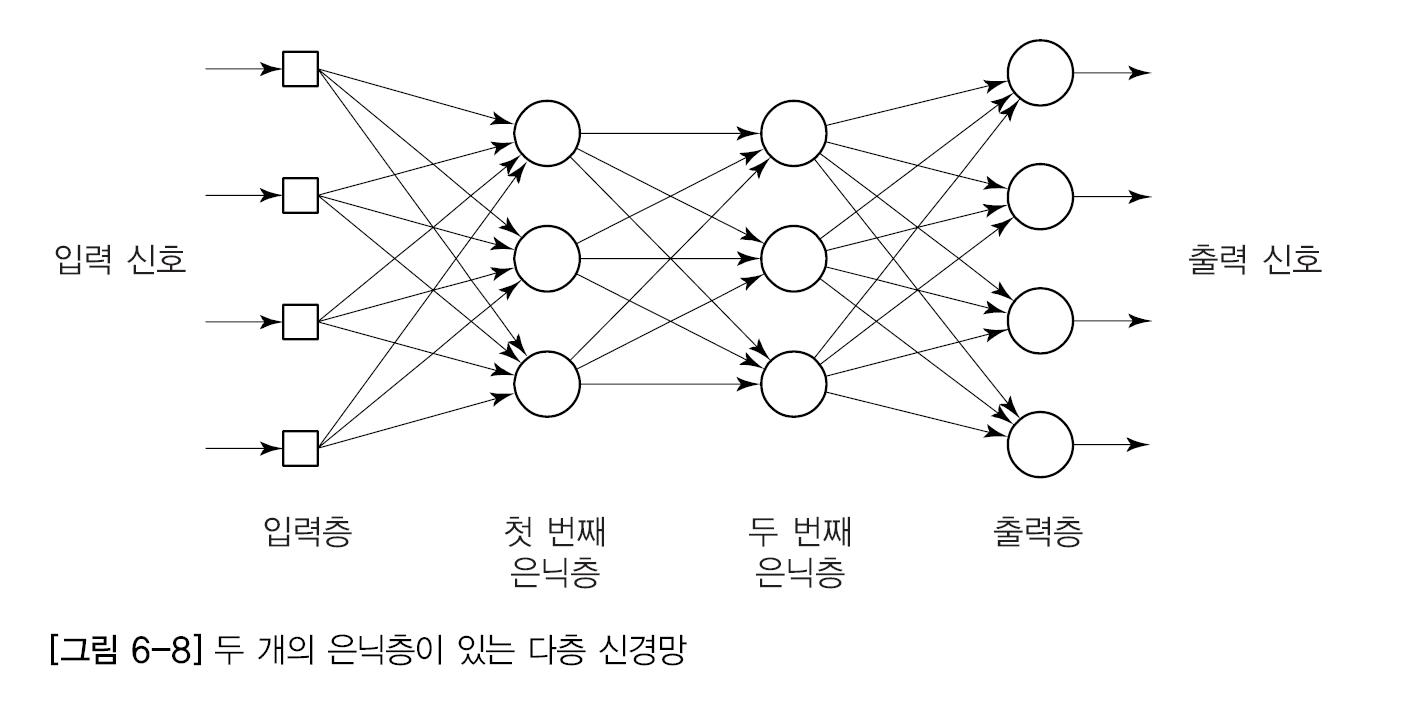

* 위의 그림과 같이 인공신경망은 입력층(Input Layer), 은닉층(Hidden Layers), 출력층(Output Layer) 구성
* 여러개의 층으로 쌓여진 인공신경망을 딥러닝
* 다층으로 쌓는 이유는 복잡한 문제를 해결가능

##**2.1 층의 구분**

**입력층(Input Layer)**
* 데이터셋의 특성(Feature)에 따라 입력층 노드의 수가 결정
* 입력층은 어떤 계산도 수행하지 않음
* 신경망의 층수(깊이, depth)를 셀 때 입력층은 포함하지 않음
* 비유하자면 우리가 시각, 촉각, 청각 등 우리가 느낀 감각을 받는 과정 

**은닉층(Hidden Layers)**
* 입력된 신호가 가중치, 편향과 연산되는 층
* 계산의 결과를 사용자가 볼 수 없음
* 딥러닝(Deep Learning)이라고 하면 은닉층이 2개 이상
* 비유하면 감각이 몸의 신경을 통해 뇌로 전달되는 과정

**출력층(Output Layer)**
* 문제 종류에 따라서 출력층의 설계가 다름(이진분류, 다중분류, 회귀)
* 출력 레이어는 원하는 예측이 얻어지는 신경망의 마지막 레이어
* 우리가 감각을 통해 아 이건 설탕이다, 소금이다 등 결과를 얻는 과정

#**3. 논리 게이트**

추가

#**4. 예제**

여기서 예제는 다중분류인데 배울 당시 손실함수를 binary_crossentropy 설정하여 원핫 벡터화를 함

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/health.csv')

In [ ]:
df.head(), df.shape

(   SEX  BTH_G  SBP  DBP  FBS  DIS   BMI
 0    1      1  116   78   94    4  16.6
 1    1      1  100   60   79    4  22.3
 2    1      1  100   60   87    4  21.9
 3    1      1  111   70   72    4  20.2
 4    1      1  120   80   98    4  20.0, (1000000, 7))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
label = 'DIS'
train, test = train_test_split(df, test_size=0.2, random_state=42)
X_train = train.drop(label,axis=1)
y_train = train[label]
X_test = test.drop(label,axis=1)
y_test = test[label]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)
y_test.head()
# 여기서 우리가 최종 분류는 1,2,3,4 중에 고르는 다중분류임으로 원-핫 벡터화를 해서 하자.

,1,2,3,4
987231,0,1,0,0
79954,0,0,0,1
567130,0,0,0,1
500891,0,1,0,0
55399,0,0,0,1


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, activation='softmax'))
# 원핫 벡터화를 안할시 차원수가 1차원원임으로 유닛수를 1밖에 못사용하여 정확도가 떨어진다

아래는 tf.keras.layers.Dense() 파라미터이다 참고하자

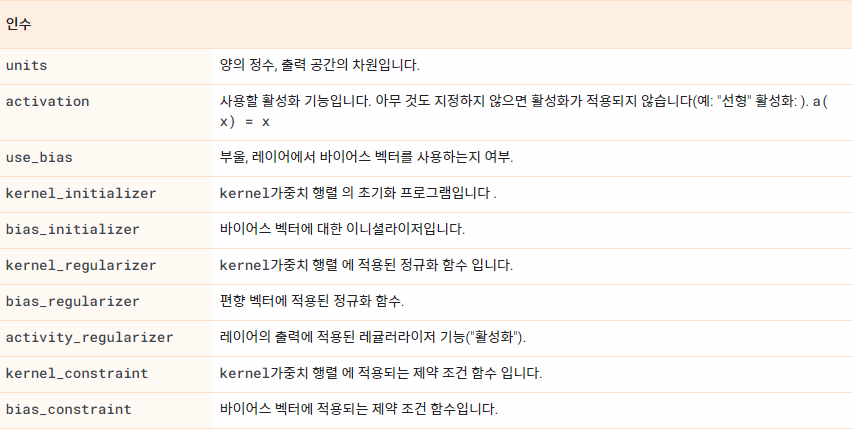

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
25000/25000 [==============================] - 36s 1ms/step - loss: 1.9189 - accuracy: 0.6652
Epoch 2/10
25000/25000 [==============================] - 34s 1ms/step - loss: 1.8666 - accuracy: 0.6676
Epoch 3/10
25000/25000 [==============================] - 34s 1ms/step - loss: 1.8730 - accuracy: 0.6684
Epoch 4/10
25000/25000 [==============================] - 34s 1ms/step - loss: 1.8500 - accuracy: 0.6686
Epoch 5/10
25000/25000 [==============================] - 34s 1ms/step - loss: 1.8380 - accuracy: 0.6704
Epoch 6/10
25000/25000 [==============================] - 34s 1ms/step - loss: 1.8339 - accuracy: 0.6714
Epoch 7/10
25000/25000 [==============================] - 34s 1ms/step - loss: 1.8248 - accuracy: 0.6709
Epoch 8/10
25000/25000 [==============================] - 33s 1ms/step - loss: 1.8272 - accuracy: 0.6717
Epoch 9/10
25000/25000 [==============================] - 34s 1ms/step - loss: 1.8173 - accuracy: 0.6732
Epoch 10/10
25000/25000 [==============================

In [ ]:
model.evaluate(X_test, y_test, verbose=2)

6250/6250 - 6s - loss: 0.7461 - accuracy: 0.7450 - 6s/epoch - 995us/step


[0.7460821866989136, 0.7449949979782104]

* 원-핫 벡터화를 안하면 출력층에서 분류를 제대로 하지못함
* 예시에서 원-핫 벡터화를 안하고 1차원으로 사용 시 0.05라는 정확도가 나왔지만 차원을 늘릴 시 정확도가 0.745가 나옴  

#4. 참고

https://koreapy.tistory.com/917

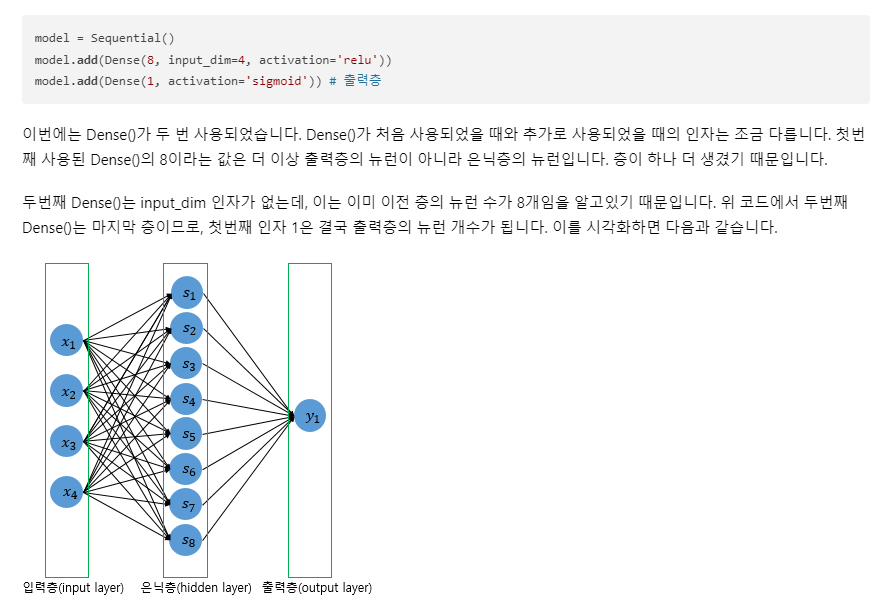

https://wikidocs.net/32105

https://www.simplilearn.com/tutorials/deep-learning-tutorial/perceptron